In [ ]:
!pip install Augmentor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from keras.applications.mobilenet import MobileNet
import os
from keras.preprocessing.image import ImageDataGenerator
import glob
from keras import layers
from keras.applications.mobilenet import MobileNet

In [ ]:
ROOT_PATH  = "/content/drive/MyDrive/MalariaDatasetNEW"
TRAIN_PATH = os.path.join(ROOT_PATH, "train")
TEST_PATH  = os.path.join(ROOT_PATH, "test")

# Add Augmented Images
I needed to sample more augmented images in order to balance the dataset more






In [ ]:
path_normal  = os.path.join(TRAIN_PATH, "NORMAL")
path_malaria = os.path.join(TRAIN_PATH, "MALARIA")

normal_img_total = len(glob.glob(path_normal + "/*"))
malaria_img_total = len(glob.glob(path_malaria + "/*"))

In [ ]:
path_malaria

'/content/drive/MyDrive/MalariaDatasetNEW/train/MALARIA'

In [ ]:
p_1 = Augmentor.Pipeline(path_normal)

Initialised with 1250 image(s) found.
Output directory set to /content/drive/MyDrive/MalariaDatasetNEW/train/NORMAL/output.

In [ ]:
p_1.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p_1.flip_random(probability=0.7) 

In [ ]:
p_1.sample(int(normal_img_total * 0.3))

Processing <PIL.Image.Image image mode=RGB size=114x121 at 0x7F05DC5DFF90>: 100%|██████████| 375/375 [00:04<00:00, 88.57 Samples/s]


In [ ]:
int(normal_img_total * 0.3), len(glob.glob(path_normal + "/output/*"))

(375, 375)

In [ ]:
p_2 = Augmentor.Pipeline("/content/drive/MyDrive/MalariaDatasetNEW/project_dataset/train/MALARIA")

Initialised with 682 image(s) found.
Output directory set to /content/drive/MyDrive/MalariaDatasetNEW/project_dataset/train/MALARIA/output.

In [ ]:
p_2.zoom(probability=0.7, min_factor=1.1, max_factor=1.5)
p_2.flip_random(probability=0.7)

In [ ]:
 p_2.sample(700)

Processing <PIL.Image.Image image mode=RGB size=80x82 at 0x7FCC33A654D0>: 100%|██████████| 700/700 [00:12<00:00, 56.55 Samples/s]


In [ ]:
int(malaria_img_total * 0.3), len(glob.glob(path_malaria+"/*.*"))

(157, 525)

In [ ]:
len(os.listdir(TRAIN_PATH + "/MALARIA"))

683

In [ ]:
len(os.listdir(TRAIN_PATH + "/NORMAL"))

1626

# Load Dataset

Creates the training and testing generators for the model 

In [ ]:
ROOT_PATH  = "/content/drive/MyDrive/MalariaDatasetNEW/project_dataset"
TRAIN_PATH = os.path.join(ROOT_PATH, "train") 
TEST_PATH  = os.path.join(ROOT_PATH, "test")

In [ ]:
IMG_DIM          = 96
IMG_SIZE         = (IMG_DIM, IMG_DIM)
TRAIN_BATCH_SIZE = 16
TEST_BATCH_SIZE  = len(os.listdir(TEST_PATH + "/MALARIA")) + len(os.listdir(TEST_PATH + "/NORMAL"))

In [ ]:
len(os.listdir(TRAIN_PATH + "/MALARIA")), len(os.listdir(TRAIN_PATH + "/NORMAL"))

(1383, 1625)

In [ ]:
TEST_BATCH_SIZE

525

In [ ]:
os.listdir(TEST_PATH)

['NORMAL', 'MALARIA']

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    directory=TRAIN_PATH,
    target_size=IMG_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest'
)

test_generator = datagen.flow_from_directory(
    directory=TEST_PATH,
    target_size=IMG_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=TEST_BATCH_SIZE,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest'
)

Found 3007 images belonging to 2 classes.
Found 525 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from random import randint
img, label = next(iter(train_generator))

(16,)


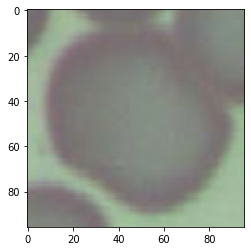

In [ ]:
idx = randint(0, TRAIN_BATCH_SIZE-1)
print(label.shape)
plt.imshow(img[idx,...].squeeze(),cmap='bone')

# Tested Failed Code 
Section of code that was attempted but didn't work.

In [ ]:
# mobile = MobileNetV3Small(
#     input_shape=(IMG_DIM, IMG_DIM, 3),
#     alpha=1.0,
#     include_top=False,
#     weights='imagenet',
#     input_tensor=None,
#     pooling=None,
#     classes=2,
    # classifier_activation='softmax'
# )

# model =tf.keras.applications.resnet50.ResNet50(
#     include_top=True,
#     weights='imagenet',
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     **kw


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(2, activation = "sigmoid"))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

In [ ]:
from keras import metrics
from tensorflow.keras import optimizers 

# sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9)

# sgd = tf.keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9)

model.compile(optimizer = "adam", loss = tf.keras.metrics.categorical_crossentropy, metrics = LOSS_METRICS)

# Train Method

Provides code that initializes the model and performs the training process

In [ ]:
from tensorflow.keras.applications import MobileNetV3Small

# Takes in an RGB image of size 96 x 96
IMG_SHAPE = (96, 96, 3)

# Inits MobileNetV2 model that is Pre-trained on Image Net 
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# Makes sure that the base model is frozen during training so that it only trains the last layer
base_model.trainable = False

In [ ]:
# Adds a pooling layer and a dense layer that outputs the raw logits of the model
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

In [ ]:
# Combine all the parts together into the final model
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
# Courtesy of: https://blog.roboflow.com/how-to-train-mobilenetv2-on-a-custom-dataset/

# Compile the model using RMSprop as the optim and BCE as the loss
# Loss takes in the raw logits
learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Trains for 20 epochs using the training generator initialized earlier
epochs = 20
history = model.fit(train_generator,
                    epochs=epochs,)

Epoch 1/20
188/188 [==============================] - 211s 1s/step - loss: 0.5552 - accuracy: 0.7157
Epoch 2/20
188/188 [==============================] - 7s 37ms/step - loss: 0.3259 - accuracy: 0.8859
Epoch 3/20
188/188 [==============================] - 7s 38ms/step - loss: 0.2460 - accuracy: 0.9125
Epoch 4/20
188/188 [==============================] - 7s 37ms/step - loss: 0.2016 - accuracy: 0.9292
Epoch 5/20
188/188 [==============================] - 7s 38ms/step - loss: 0.1745 - accuracy: 0.9401
Epoch 6/20
188/188 [==============================] - 7s 37ms/step - loss: 0.1576 - accuracy: 0.9485
Epoch 7/20
188/188 [==============================] - 7s 37ms/step - loss: 0.1447 - accuracy: 0.9504
Epoch 8/20
188/188 [==============================] - 7s 37ms/step - loss: 0.1344 - accuracy: 0.9561
Epoch 9/20
188/188 [==============================] - 7s 37ms/step - loss: 0.1257 - accuracy: 0.9578
Epoch 10/20
188/188 [==============================] - 7s 37ms/step - loss: 0.1196 - accura

In [ ]:
# Outputs the params summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Shows the dict of the training history per epoch
history.history

{'accuracy': [0.7156634330749512,
  0.8859328031539917,
  0.9125373959541321,
  0.9291653037071228,
  0.940139651298523,
  0.9484536051750183,
  0.9504489302635193,
  0.9561024308204651,
  0.9577652215957642,
  0.9590954184532166,
  0.9610908031463623,
  0.9640837907791138,
  0.9660791754722595,
  0.9647489190101624,
  0.9667442440986633,
  0.9677419066429138,
  0.969072163105011,
  0.9700698256492615,
  0.969072163105011,
  0.9694046974182129],
 'loss': [0.5551840662956238,
  0.32590624690055847,
  0.2459678053855896,
  0.20162281394004822,
  0.17453718185424805,
  0.15760013461112976,
  0.14467060565948486,
  0.13440002501010895,
  0.12573498487472534,
  0.11964310705661774,
  0.11394879221916199,
  0.10895966738462448,
  0.1051270067691803,
  0.10184020549058914,
  0.09822506457567215,
  0.09524205327033997,
  0.09285299479961395,
  0.09035853296518326,
  0.08837120234966278,
  0.0864487960934639]}

Text(0.5, 0, 'Epoch')

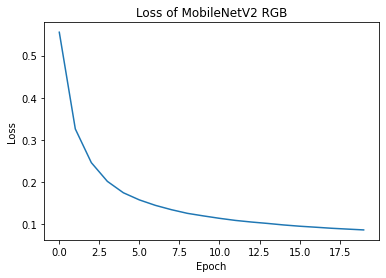

In [ ]:
# Plots the traning loss
plt.plot(history.history['loss'])
plt.title("Loss of MobileNetV2 RGB")
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

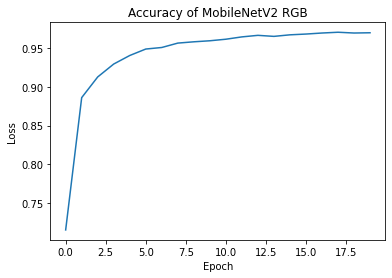

In [ ]:
# Plots the training acc
plt.plot(history.history['accuracy'])
plt.title("Accuracy of MobileNetV2 RGB")
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Testing

In [ ]:
from sklearn.metrics import confusion_matrix

# prints 

for img, label in test_generator:
    out = model(img) 
    # print(out.shape)
    # print(out)
    # print(label.shape)
    break

probs = tf.math.sigmoid(out)
outs = tf.round(probs)

outs = outs.numpy().squeeze()

print(f"Total Accuracy =  {(outs == label).sum() / 525}")

cm = confusion_matrix(outs, label)
print(cm.diagonal())

acc = cm.diagonal()/cm.sum(axis=1)
print("Class Accuracies")
print("----------------")
print(f"MALARIA: {acc[0]}")
print(f"NORMAL: {acc[1]}")

Total Accuracy =  0.9904761904761905
[ 25 495]
Class Accuracies
----------------
MALARIA: 0.8333333333333334
NORMAL: 1.0


In [ ]:
img.shape

(525, 96, 96, 3)

In [ ]:
label.shape

(525,)

# TFLITE MODELS

Some experimentation with TFLite on the successfully trained model

In [ ]:
ORG_PATH = "/content/drive/MyDrive/TF_SAVED/model"
NO_QUANT_PATH = "/content/drive/MyDrive/TF_SAVED/model_no_quant.tflite" 
QUANT_PATH = "/content/drive/MyDrive/TF_SAVED/quant" 

In [ ]:
model.save(ORG_PATH)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TF_SAVED/model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TF_SAVED/model/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(ORG_PATH)
model_no_quant_tflite = converter.convert()

open(NO_QUANT_PATH, "wb").write(model_no_quant_tflite)

8873288

In [ ]:
size_tf = os.scandir(ORG_PATH)
size_no_quant = os.path.getsize("/content/drive/MyDrive/TF_SAVED/model_no_quant.tflite")

In [ ]:
print(size_tf)
print(size_no_quant)

8873288


In [ ]:
model.evaluate_tflite(model_no_quant_tflite, x_test, y_test)

NameError: ignored